# Keystone Project - Creating and Implementing a customized Investment Strategy (semi-active)

__Assignment / Goal:__

You want to invest in US Technology Stocks that pay Dividends with a price-weighted approach to avoid highly concentrated positions in AAPL and MSFT. The steps are:

1. Get all nasdaq listings from the csv-file nasdaq_listings.csv (alternatively, you can get the latest version from the nasdaq stock screener)

2. Filter by
- US Stocks
- Technology Stocks (Sector)

3. Load Prices and Dividends for remaining Ticker Symbols for the last three years (from "2019-12-01" to "2022-11-30") 

4. Identify Dividend paying Stocks (any Dividends in the most recent year -> last 252 trading days)

5. Create a price-weighted Total Return Index for the Dividend-paying US Tech Stocks covering the last three years.

6. Track the Index with only 40 stocks. Try to minimize the Tracking Error. 

7. Buy one share each with your IBKR Paper Trading Account. 

8. Compare your semi-active Strategy with an appropriate Benchmark (broad market index)

---

# Get all nasdaq listings

In [183]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
listings = pd.read_csv("nasdaq_listings.csv", index_col = "Symbol")
listings

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
A,Agilent Technologies Inc. Common Stock,$156.86,11.7200,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products
AA,Alcoa Corporation Common Stock,$49.36,2.7300,5.86%,8.733618e+09,NaN,2016.0,5592225,Industrials,Metal Fabrications
AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.005,0.0050,0.05%,1.250625e+09,NaN,2021.0,11399,Finance,Business Services
AACG,ATA Creativity Global American Depositary Shares,$1.68,-0.0200,-1.18%,5.271323e+07,China,2008.0,601,Consumer Discretionary,Service to the Health Industry
AACI,Armada Acquisition Corp. I Common Stock,$9.985,0.0150,0.15%,2.067844e+08,United States,2021.0,83731,Industrials,Consumer Electronics/Appliances
...,...,...,...,...,...,...,...,...,...,...
ZWRKW,Z-Work Acquisition Corp. Warrant,$0.0005,-0.0006,-54.55%,0.000000e+00,United States,2021.0,2014,Industrials,Consumer Electronics/Appliances
ZWS,Zurn Elkay Water Solutions Corporation Common ...,$24.86,1.0000,4.19%,4.419974e+09,United States,2012.0,1257952,Utilities,Environmental Services
ZYME,Zymeworks Inc. Common Shares,$7.76,-0.1900,-2.39%,4.787484e+08,Canada,2022.0,632987,Health Care,Biotechnology: Biological Products (No Diagnos...


In [139]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8290 entries, A to ZYXI
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        8290 non-null   object 
 1   Last Sale   8290 non-null   object 
 2   Net Change  8290 non-null   float64
 3   % Change    8289 non-null   object 
 4   Market Cap  7828 non-null   float64
 5   Country     7488 non-null   object 
 6   IPO Year    5071 non-null   float64
 7   Volume      8290 non-null   int64  
 8   Sector      7397 non-null   object 
 9   Industry    7397 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 712.4+ KB


In [140]:
# How many instument in each Sector ? 
listings.Sector.value_counts()

Sector
Finance                   1915
Health Care               1325
Industrials               1196
Consumer Discretionary    1084
Technology                 874
Real Estate                302
Energy                     199
Utilities                  180
Consumer Staples           151
Telecommunications          69
Basic Materials             56
Miscellaneous               46
Name: count, dtype: int64

In [141]:
# How much industries have under the Technology sector ? 
listings[listings.Sector == "Technology"].Industry.value_counts()

Industry
EDP Services                                                      276
Computer Software: Prepackaged Software                           217
Semiconductors                                                    104
Retail: Computer Software & Peripheral Equipment                   66
Industrial Machinery/Components                                    43
Electronic Components                                              28
Security Systems Services                                          23
Radio And Television Broadcasting And Communications Equipment     22
Interactive Media                                                  19
Computer peripheral equipment                                      18
Electrical Products                                                17
Computer Software: Programming Data Processing                     17
Computer Manufacturing                                             11
Internet and Information Services                                  10
EDP Periphe

---

# Filter Listings

In [142]:
mask1 = listings.Sector == "Technology"
mask1

Symbol
A        False
AA       False
AAC      False
AACG     False
AACI     False
         ...  
ZWRKW    False
ZWS      False
ZYME     False
ZYNE     False
ZYXI     False
Name: Sector, Length: 8290, dtype: bool

In [143]:
mask2 = (listings.Country == "United States") 
mask2

Symbol
A         True
AA       False
AAC      False
AACG     False
AACI      True
         ...  
ZWRKW     True
ZWS       True
ZYME     False
ZYNE      True
ZYXI      True
Name: Country, Length: 8290, dtype: bool

In [144]:
# filter only the US stock under the technology filter
tech = listings.loc[mask1 & mask2]
tech

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
AAOI,Applied Optoelectronics Inc. Common Stock,$2.28,0.0300,1.33%,6.503408e+07,United States,2013.0,110375,Technology,Semiconductors
AAPL,Apple Inc. Common Stock,$150.18,2.1700,1.47%,2.603720e+12,United States,1980.0,51718866,Technology,Computer Manufacturing
ACCD,Accolade Inc. Common Stock,$8.19,-0.1700,-2.03%,5.891797e+08,United States,2020.0,426815,Technology,Interactive Media
ACEV,ACE Convergence Acquisition Corp. Class A Ordi...,$9.78,0.6400,7.00%,8.306377e+07,United States,2020.0,30718,Technology,Semiconductors
ACEVU,ACE Convergence Acquisition Corp. Unit,$9.769,-0.0110,-0.11%,0.000000e+00,United States,2020.0,858,Technology,Semiconductors
...,...,...,...,...,...,...,...,...,...,...
ZFOX,ZeroFox Holdings Inc. Common Stock,$4.68,0.4300,10.12%,5.530732e+08,United States,NaN,108440,Technology,EDP Services
ZFOXW,ZeroFox Holdings Inc. Warrants,$0.1299,0.0299,29.90%,1.535133e+07,United States,NaN,2000,Technology,EDP Services
ZI,ZoomInfo Technologies Inc Common Stock,$27.36,-0.1500,-0.55%,1.104406e+10,United States,2020.0,3322873,Technology,Computer Software: Prepackaged Software


In [145]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, AAOI to ZS
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        616 non-null    object 
 1   Last Sale   616 non-null    object 
 2   Net Change  616 non-null    float64
 3   % Change    616 non-null    object 
 4   Market Cap  616 non-null    float64
 5   Country     616 non-null    object 
 6   IPO Year    396 non-null    float64
 7   Volume      616 non-null    int64  
 8   Sector      616 non-null    object 
 9   Industry    616 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ KB


In [146]:
# all the symbols ander the technologgy sector in USA
symbols = list(tech.index)
symbols

['AAOI',
 'AAPL',
 'ACCD',
 'ACEV',
 'ACEVU',
 'ACEVW',
 'ACIW',
 'ACLS',
 'ACMR',
 'ACON',
 'ACONW',
 'ADBE',
 'ADEA',
 'ADI',
 'ADSK',
 'AEYE',
 'AFRM',
 'AGIL',
 'AGILW',
 'AGYS',
 'AIP',
 'AIRG',
 'AKLI',
 'ALGM',
 'ALKT',
 'ALOT',
 'ALRM',
 'ALTR',
 'AMAT',
 'AMBA',
 'AMD',
 'AMKR',
 'AMPG',
 'AMPGW',
 'AMPL',
 'AMST',
 'AMSWA',
 'AMWL',
 'ANGI',
 'ANSS',
 'APCX',
 'APH',
 'APP',
 'APPF',
 'APPN',
 'APPS',
 'ARLO',
 'ARRY',
 'ARW',
 'ASGN',
 'ASTI',
 'ASUR',
 'ASYS',
 'ATKR',
 'ATOM',
 'AUGX',
 'AUID',
 'AUR',
 'AUROW',
 'AUUD',
 'AUUDW',
 'AVCT',
 'AVCTW',
 'AVDX',
 'AVGO',
 'AVID',
 'AVPT',
 'AVPTW',
 'AVT',
 'AWRE',
 'AXTI',
 'AYX',
 'AZPN',
 'BAND',
 'BASE',
 'BCO',
 'BCOV',
 'BEAT',
 'BEATW',
 'BEEM',
 'BEEMW',
 'BHE',
 'BIGC',
 'BKKT',
 'BKTI',
 'BKYI',
 'BL',
 'BLBX',
 'BLIN',
 'BLKB',
 'BLZE',
 'BMBL',
 'BNFT',
 'BOX',
 'BRC',
 'BRZE',
 'BSY',
 'BTRS',
 'BW',
 'CACI',
 'CALX',
 'CARG',
 'CASA',
 'CCCS',
 'CCRD',
 'CCSI',
 'CDAY',
 'CDNS',
 'CERT',
 'CETX',
 'CETXP',
 'CEVA

In [147]:
tech[tech.index.str.contains("ACEV")]

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
ACEV,ACE Convergence Acquisition Corp. Class A Ordi...,$9.78,0.6400,7.00%,83063770.0,United States,2020.0,30718,Technology,Semiconductors
ACEVU,ACE Convergence Acquisition Corp. Unit,$9.769,-0.0110,-0.11%,0.0,United States,2020.0,858,Technology,Semiconductors
ACEVW,ACE Convergence Acquisition Corp. Warrant,$0.1699,0.0199,13.27%,0.0,United States,2020.0,132016,Technology,Semiconductors


---

# Loading Prices and Dividends

In [148]:
start = "2019-12-01"
end = "2022-11-30"

In [150]:
# Load all the symbols
data = yf.download(symbols, start, end, actions = True)
data

[*********************100%%**********************]  616 of 616 completed


78 Failed downloads:
['NXPLW', 'AVPTW', 'DAVEW', 'KPLTW', 'VRMEW', 'SBIGW', 'MAPSW', 'NOGNW', 'STIXW', 'DFLIW', 'CREXW', 'CPTNW', 'CMAXW', 'PRSTW', 'PAYOW', 'HOLOW', 'SURGW', 'ONFOW', 'INDIW', 'LVOXW', 'GROMW', 'AUROW', 'VERBW', 'SOUNW', 'IVDAW', 'AGILW', 'ACONW', 'KBNTW', 'DTSTW', 'RUMBW', 'EVLVW', 'AUUDW', 'PETWW', 'RGTIW', 'BEEMW', 'BEATW']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
['DBD']: Exception("%ticker%: Data doesn't exist for startDate = 1575176400, endDate = 1669784400")
['LTCHW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2019-12-01 -> 2022-11-30)')
['LYLT', 'XM', 'AVCTW', 'DCT', 'PFDRU', 'EMBK', 'BNFT', 'PAYA', 'VENAW', 'PEAR', 'QUMU', 'CVT', 'CYXT', 'ACEVU', 'RNWK', 'SMFRW', 'KNBE', 'MSPR', 'CORZ', 'MSPRZ', 'ACEVW', 'EMBKW', 'CYRN', 'VENA', 'ACEV', 'CORZW', 'AVCT', 'VENAR', 'SUMO', 'SMFR', 'PEARW', 'BTRS', 'MNTV', 'COUP', 'ONEM', 'PFDR', 'MICT', 'EVOP', 'MSPRW', 'PFDRW']: Exception('%ticker%: No timezone foun

Adj Close                                                           \
                AAOI        AAPL  ACCD ACEV ACEVU ACEVW       ACIW       ACLS   
Date                                                                            
2019-12-02     10.71   64.338280   NaN  NaN   NaN   NaN  36.730000  21.209999   
2019-12-03     10.35   63.191128   NaN  NaN   NaN   NaN  36.639999  21.530001   
2019-12-04     10.39   63.748878   NaN  NaN   NaN   NaN  36.150002  22.299999   
2019-12-05     10.46   64.684135   NaN  NaN   NaN   NaN  36.049999  22.740000   
2019-12-06     10.37   65.933594   NaN  NaN   NaN   NaN  36.410000  22.840000   
...              ...         ...   ...  ...   ...   ...        ...        ...   
2022-11-22      2.28  149.345215  8.19  NaN   NaN   NaN  20.410000  78.699997   
2022-11-23      2.18  150.230316  8.61  NaN   NaN   NaN  20.639999  79.070000   
2022-11-25      2.19  147.286743  8.44  NaN   NaN   NaN  20.900000  79.379997   
2022-11-28      2.11  143.418365  7.89  NaN   NaN   NaN  20.430000  76.690002   
2022-11-29      2.11  140.385315  8.20  NaN   NaN   NaN  20.370001  76.309998   

                             ...     Volume                             \
                ACMR   ACON  ...       XPON      XRX     YELP     YEXT   
Date                         ...                                         
2019-12-02  4.636667    NaN  ...        NaN  1421400  1311600   739000   
2019-12-03  4.663333    NaN  ...        NaN  3213300   851600   847000   
2019-12-04  4.703333    NaN  ...        NaN  1470000   820000   713300   
2019-12-05  4.890000    NaN  ...        NaN  2357400   932500  1957600   
2019-12-06  5.140000    NaN  ...        NaN  1826100   630900  8920300   
...              ...    ...  ...        ...      ...      ...      ...   
2022-11-22  8.740000  0.840  ...    24400.0   963000   821100   642200   
2022-11-23  8.670000  0.820  ...    37000.0  1099600   436000   793900   
2022-11-25  8.630000  0.820  ...  1375600.0   512000   176000   330700   
2022-11-28  8.250000  0.765  ...   132200.0   839400   412300  1086800   
2022-11-29  8.470000  0.798  ...    60600.0  1110300   427000   565500   

                                                                     
              ZBRA      ZFOX    ZFOXW         ZI        ZM       ZS  
Date                                                                 
2019-12-02  305600       NaN      NaN        NaN   3138600  4164600  
2019-12-03  288500       NaN      NaN        NaN   2444200  4494500  
2019-12-04  368500       NaN      NaN        NaN   2076500  7754300  
2019-12-05  355900       NaN      NaN        NaN   3672600  3181000  
2019-12-06  461400       NaN      NaN        NaN  11253600  3071500  
...            ...       ...      ...        ...       ...      ...  
2022-11-22  442100  109500.0   2000.0  3324000.0  15729400  1203000  
2022-11-23  464600   44900.0  24486.0  2454100.0   4938100  1349400  
2022-11-25  202400   19600.0   3500.0  2059400.0   2658000   603300  
2022-11-28  492900   51000.0      0.0  2301000.0   6245400  1515000  
2022-11-29  534900   19100.0   1600.0  4247900.0   4879300  1906300  

[755 rows x 4772 columns]

In [152]:
# Convert the index to be date time index 
data.index = pd.to_datetime(data.index)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2019-12-02 to 2022-11-29
Columns: 4772 entries, ('Adj Close', 'AAOI') to ('Volume', 'ZS')
dtypes: float64(4381), int64(391)
memory usage: 27.5 MB


---

# Dividend paying Stocks

Dividend paying stocks: paying __any__ Dividends in the most recent year (since "2021-12-01") 

In [155]:
# sum the total dividents returns of each company since 2021-12-01
dividends = data.Dividends.loc["2021-12-01":].sum()
dividends

AAOI     0.00
AAPL     0.91
ACCD     0.00
ACIW     0.00
ACLS     0.00
         ... 
ZFOX     0.00
ZFOXW    0.00
ZI       0.00
ZM       0.00
ZS       0.00
Length: 538, dtype: float64

In [156]:
# snity check: extract all instruments that have dividends paymanys > 0  
dividends[dividends > 0]

AAPL     0.910000
ADEA     0.089684
ADI      2.970000
AMAT     1.020000
AMKR     0.200000
           ...   
UI       2.400000
VRT      0.010000
VSH      0.500000
XELAP    0.835000
XRX      1.000000
Length: 86, dtype: float64

In [157]:
# Store those instruments that have dividends patmant.
symbols = dividends[dividends > 0].index
symbols

Index(['AAPL', 'ADEA', 'ADI', 'AMAT', 'AMKR', 'AMSWA', 'APH', 'AVGO', 'AVT',
       'BCO', 'BHE', 'BKTI', 'BRC', 'BSY', 'CIX', 'CLMB', 'CMTL', 'CNXC',
       'CSGS', 'CSPI', 'CTS', 'CTSH', 'DLB', 'DNB', 'EBIX', 'ENTG', 'FSS',
       'GEGGL', 'GEN', 'GIC', 'GLW', 'HCKT', 'HPQ', 'HUBB', 'IBM', 'III',
       'INTC', 'INTU', 'JBL', 'JKHY', 'JNPR', 'KAI', 'KLAC', 'LDOS', 'LFUS',
       'LOGI', 'LRCX', 'MCHP', 'MEI', 'MPWR', 'MSA', 'MSFT', 'MSI', 'MU',
       'NATI', 'NOC', 'NRC', 'NTAP', 'NTIP', 'NVDA', 'NVEC', 'OLED', 'ORCL',
       'OTRKP', 'PCTI', 'PCYG', 'PEGA', 'POWI', 'PRGS', 'QCOM', 'RBCN', 'RELL',
       'SLNHP', 'SLP', 'SPOK', 'SSNC', 'SSTK', 'SWKS', 'TAIT', 'TTEC', 'TXN',
       'UI', 'VRT', 'VSH', 'XELAP', 'XRX'],
      dtype='object')

In [158]:
# Take the close price of those instrumnts. 
close = data.Close[symbols].copy()
close

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,SSTK,SWKS,TAIT,TTEC,TXN,UI,VRT,VSH,XELAP,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,66.040001,5.037037,111.260002,56.700001,11.790000,15.35,51.349998,310.720001,40.700001,91.639999,...,41.980000,98.360001,2.70,44.709999,118.790001,196.929993,10.350,19.690001,NaN,38.500000
2019-12-03,64.862503,4.947090,110.250000,55.340000,11.740000,15.39,50.889999,306.519989,39.500000,89.830002,...,42.750000,97.440002,2.96,40.570000,117.750000,196.220001,10.380,19.629999,NaN,38.250000
2019-12-04,65.434998,5.021164,114.389999,56.090000,12.150000,15.39,51.494999,309.720001,40.630001,89.790001,...,43.580002,98.820000,3.05,40.310001,120.279999,195.389999,10.380,20.090000,NaN,38.349998
2019-12-05,66.394997,4.968254,113.430000,55.840000,12.450000,15.28,51.490002,311.190002,41.080002,90.690002,...,43.090000,99.980003,3.14,38.110001,120.739998,196.130005,10.375,20.129999,NaN,37.820000
2019-12-06,67.677498,5.066138,115.889999,56.599998,12.600000,15.31,52.014999,316.049988,41.369999,91.489998,...,43.360001,101.360001,3.15,39.130001,122.370003,196.880005,10.390,20.209999,NaN,37.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,150.179993,10.100000,168.429993,107.040001,27.600000,14.29,80.080002,530.049988,44.849998,60.900002,...,52.020000,94.180000,3.79,47.389999,177.220001,294.230011,13.810,22.670000,3.600,15.440000
2022-11-23,151.070007,10.270000,169.199997,107.669998,27.750000,14.54,80.070000,533.640015,45.209999,60.619999,...,52.540001,94.989998,3.77,47.290001,178.979996,293.070007,13.860,22.639999,3.600,15.750000
2022-11-25,148.110001,10.260000,167.089996,105.820000,27.299999,14.60,80.339996,529.909973,45.139999,60.720001,...,52.709999,92.910004,3.75,47.000000,177.070007,294.079987,13.740,22.450001,3.500,15.910000


---

# Creating a price-weighted Total Return Index

In [159]:
close

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,SSTK,SWKS,TAIT,TTEC,TXN,UI,VRT,VSH,XELAP,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,66.040001,5.037037,111.260002,56.700001,11.790000,15.35,51.349998,310.720001,40.700001,91.639999,...,41.980000,98.360001,2.70,44.709999,118.790001,196.929993,10.350,19.690001,NaN,38.500000
2019-12-03,64.862503,4.947090,110.250000,55.340000,11.740000,15.39,50.889999,306.519989,39.500000,89.830002,...,42.750000,97.440002,2.96,40.570000,117.750000,196.220001,10.380,19.629999,NaN,38.250000
2019-12-04,65.434998,5.021164,114.389999,56.090000,12.150000,15.39,51.494999,309.720001,40.630001,89.790001,...,43.580002,98.820000,3.05,40.310001,120.279999,195.389999,10.380,20.090000,NaN,38.349998
2019-12-05,66.394997,4.968254,113.430000,55.840000,12.450000,15.28,51.490002,311.190002,41.080002,90.690002,...,43.090000,99.980003,3.14,38.110001,120.739998,196.130005,10.375,20.129999,NaN,37.820000
2019-12-06,67.677498,5.066138,115.889999,56.599998,12.600000,15.31,52.014999,316.049988,41.369999,91.489998,...,43.360001,101.360001,3.15,39.130001,122.370003,196.880005,10.390,20.209999,NaN,37.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,150.179993,10.100000,168.429993,107.040001,27.600000,14.29,80.080002,530.049988,44.849998,60.900002,...,52.020000,94.180000,3.79,47.389999,177.220001,294.230011,13.810,22.670000,3.600,15.440000
2022-11-23,151.070007,10.270000,169.199997,107.669998,27.750000,14.54,80.070000,533.640015,45.209999,60.619999,...,52.540001,94.989998,3.77,47.290001,178.979996,293.070007,13.860,22.639999,3.600,15.750000
2022-11-25,148.110001,10.260000,167.089996,105.820000,27.299999,14.60,80.339996,529.909973,45.139999,60.720001,...,52.709999,92.910004,3.75,47.000000,177.070007,294.079987,13.740,22.450001,3.500,15.910000


In [160]:
# compute the weights (Price weigthed Index) over the time.
# Close of an instruments in a time point / sum of Close of all instrumenst in a time point.   
weights_PWI = close.div(close.sum(axis = 1), axis = "rows")
weights_PWI

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,SSTK,SWKS,TAIT,TTEC,TXN,UI,VRT,VSH,XELAP,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,0.011861,0.000905,0.019983,0.010184,0.002118,0.002757,0.009223,0.055807,0.007310,0.016459,...,0.007540,0.017666,0.000485,0.008030,0.021335,0.035370,0.001859,0.003536,NaN,0.006915
2019-12-03,0.011754,0.000896,0.019978,0.010028,0.002127,0.002789,0.009222,0.055544,0.007158,0.016278,...,0.007747,0.017657,0.000536,0.007352,0.021337,0.035557,0.001881,0.003557,NaN,0.006931
2019-12-04,0.011750,0.000902,0.020542,0.010072,0.002182,0.002764,0.009247,0.055618,0.007296,0.016124,...,0.007826,0.017746,0.000548,0.007239,0.021599,0.035087,0.001864,0.003608,NaN,0.006887
2019-12-05,0.011903,0.000891,0.020335,0.010011,0.002232,0.002739,0.009231,0.055789,0.007365,0.016258,...,0.007725,0.017924,0.000563,0.006832,0.021646,0.035161,0.001860,0.003609,NaN,0.006780
2019-12-06,0.012015,0.000899,0.020574,0.010048,0.002237,0.002718,0.009234,0.056110,0.007345,0.016243,...,0.007698,0.017995,0.000559,0.006947,0.021725,0.034953,0.001845,0.003588,NaN,0.006705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,0.018613,0.001252,0.020875,0.013267,0.003421,0.001771,0.009925,0.065694,0.005559,0.007548,...,0.006447,0.011673,0.000470,0.005874,0.021965,0.036467,0.001712,0.002810,0.000446,0.001914
2022-11-23,0.018618,0.001266,0.020852,0.013269,0.003420,0.001792,0.009868,0.065765,0.005572,0.007471,...,0.006475,0.011706,0.000465,0.005828,0.022057,0.036117,0.001708,0.002790,0.000444,0.001941
2022-11-25,0.018298,0.001268,0.020642,0.013073,0.003373,0.001804,0.009925,0.065466,0.005577,0.007501,...,0.006512,0.011478,0.000463,0.005806,0.021875,0.036331,0.001697,0.002773,0.000432,0.001966


In [161]:
# senity check: make sure that the total sum of weigths over time sum to one (at each time point)
weights_PWI.sum(axis = 1)

Date
2019-12-02    1.0
2019-12-03    1.0
2019-12-04    1.0
2019-12-05    1.0
2019-12-06    1.0
             ... 
2022-11-22    1.0
2022-11-23    1.0
2022-11-25    1.0
2022-11-28    1.0
2022-11-29    1.0
Length: 755, dtype: float64

In [162]:
# compute the total simple return of each stock 
total_returns = data["Adj Close"][symbols].pct_change() # Adj Close Prices!
total_returns

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,SSTK,SWKS,TAIT,TTEC,TXN,UI,VRT,VSH,XELAP,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-03,-0.017830,-0.017857,-0.009078,-0.023986,-0.004241,0.002606,-0.008958,-0.013517,-0.024450,-0.019751,...,0.018342,-0.009353,0.096296,-0.092597,-0.008755,-0.003605,0.002899,-0.003047,NaN,-0.006494
2019-12-04,0.008826,0.014973,0.037551,0.013552,0.034923,0.000000,0.011888,0.010440,0.028608,-0.000445,...,0.019415,0.014162,0.030405,-0.006409,0.021486,-0.004230,0.000000,0.023433,NaN,0.002614
2019-12-05,0.014671,-0.010537,-0.003689,-0.004457,0.024691,-0.007147,-0.000097,0.004746,0.011075,0.010023,...,-0.011244,0.011739,0.029508,-0.054577,0.003824,0.003787,-0.000482,0.001991,NaN,-0.013820
2019-12-06,0.019316,0.019702,0.021687,0.013610,0.012048,0.001963,0.010196,0.015617,0.007059,0.008821,...,0.006266,0.013803,0.003185,0.026765,0.013500,0.003824,0.001446,0.003974,NaN,-0.001322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,0.014661,0.040165,0.057712,0.018071,0.012101,-0.001398,0.006409,0.024370,0.010818,0.001645,...,0.020600,0.022806,0.005305,0.006157,0.027958,0.021490,-0.015681,0.006214,-0.044332,0.013788
2022-11-23,0.005927,0.016832,0.004572,0.008335,0.005435,0.017495,-0.000125,0.006773,0.008027,-0.004598,...,0.009996,0.008601,-0.005277,-0.002110,0.009931,-0.003942,0.003621,-0.001323,0.000000,0.020078
2022-11-25,-0.019594,-0.000974,-0.012470,-0.017182,-0.016216,0.004127,0.003372,-0.006990,-0.001548,0.001650,...,0.003236,-0.021897,-0.005305,-0.006132,-0.010671,0.003446,-0.008658,-0.008392,-0.027778,0.010159


In [163]:
# After I compute the return of each symbol, I compute the rethrn of the entire Index. 
# The return of each instrument * its index weigth, and then sum it. 
returns_index = total_returns.mul(weights_PWI.shift()).sum(axis = "columns")
returns_index

# This is represent the return of the portfolio index over the time.

Date
2019-12-02    0.000000
2019-12-03   -0.008803
2019-12-04    0.009213
2019-12-05    0.001767
2019-12-06    0.009806
                ...   
2022-11-22    0.017974
2022-11-23    0.005724
2022-11-25   -0.002235
2022-11-28   -0.020198
2022-11-29   -0.003765
Length: 755, dtype: float64

In [164]:
# compute cumelative return over the time wuth base of 100. 
index = returns_index.add(1).cumprod().mul(100)
index

Date
2019-12-02    100.000000
2019-12-03     99.119744
2019-12-04    100.032962
2019-12-05    100.209697
2019-12-06    101.192304
                 ...    
2022-11-22    147.426134
2022-11-23    148.270003
2022-11-25    147.938684
2022-11-28    144.950669
2022-11-29    144.404897
Length: 755, dtype: float64

In [165]:
index.name = "Index"

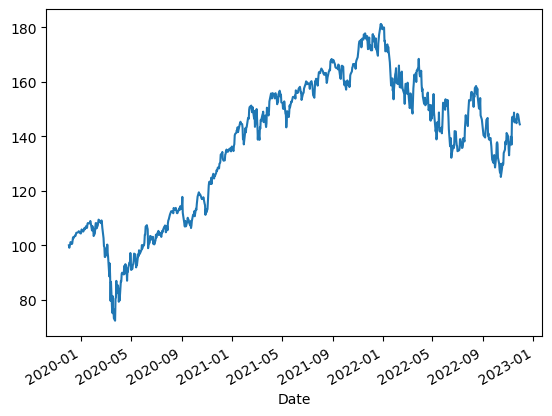

In [166]:
# Plot the index portfolio
index.plot()
plt.show()

---

# Index Tracking
> Choose randomaly 10000 portfolios, and pick the best. 

In [167]:
const = symbols.to_list()
const

['AAPL',
 'ADEA',
 'ADI',
 'AMAT',
 'AMKR',
 'AMSWA',
 'APH',
 'AVGO',
 'AVT',
 'BCO',
 'BHE',
 'BKTI',
 'BRC',
 'BSY',
 'CIX',
 'CLMB',
 'CMTL',
 'CNXC',
 'CSGS',
 'CSPI',
 'CTS',
 'CTSH',
 'DLB',
 'DNB',
 'EBIX',
 'ENTG',
 'FSS',
 'GEGGL',
 'GEN',
 'GIC',
 'GLW',
 'HCKT',
 'HPQ',
 'HUBB',
 'IBM',
 'III',
 'INTC',
 'INTU',
 'JBL',
 'JKHY',
 'JNPR',
 'KAI',
 'KLAC',
 'LDOS',
 'LFUS',
 'LOGI',
 'LRCX',
 'MCHP',
 'MEI',
 'MPWR',
 'MSA',
 'MSFT',
 'MSI',
 'MU',
 'NATI',
 'NOC',
 'NRC',
 'NTAP',
 'NTIP',
 'NVDA',
 'NVEC',
 'OLED',
 'ORCL',
 'OTRKP',
 'PCTI',
 'PCYG',
 'PEGA',
 'POWI',
 'PRGS',
 'QCOM',
 'RBCN',
 'RELL',
 'SLNHP',
 'SLP',
 'SPOK',
 'SSNC',
 'SSTK',
 'SWKS',
 'TAIT',
 'TTEC',
 'TXN',
 'UI',
 'VRT',
 'VSH',
 'XELAP',
 'XRX']

In [168]:
n = len(const)
n

86

In [169]:
i = 40
i

40

In [170]:
sims = 10000 

In [171]:
# Create 10000 portfolios with 40 random instruments, and store the best!

np.random.seed(123)
min_te = 1
tstocks = None
tportfolio = None

for sim in range(sims):

    # pick 40 random stocks
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)

    # compute the Portfolio weigths Index over the time 
    weights_pwi = close[tracking_stocks].div(close[tracking_stocks].sum(axis = 1), axis = "rows")

    # compute the returns over the time of each instuments base on its weigths
    tracking_returns = total_returns[tracking_stocks].mul(weights_pwi.shift()).sum(axis = "columns")
    
    # compute the different between our random portfolio return to the index return  
    active_returns = tracking_returns - returns_index

    # compute also the tracking error (how much our portfolio replicate the index?)
    tracking_error = active_returns.std() * np.sqrt(252)
    
    # compute the cumelative return of our random portfolio over the time
    tracking_portfolio = tracking_returns.add(1).cumprod()

    # Update & store the best, if need. 
    if tracking_error < min_te:
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [172]:
# the random portfolio with the minimum trackin error
min_te

0.02570370784530186

In [173]:
# This is the instuments in this portfolio
tstocks

array(['TXN', 'SPOK', 'CTSH', 'GEGGL', 'GIC', 'QCOM', 'VSH', 'AVGO',
       'LFUS', 'BRC', 'ENTG', 'POWI', 'OTRKP', 'HPQ', 'CLMB', 'MSA',
       'SSTK', 'HCKT', 'APH', 'NVDA', 'BCO', 'NRC', 'INTC', 'INTU', 'ADI',
       'SSNC', 'JKHY', 'HUBB', 'NOC', 'MSFT', 'EBIX', 'CSGS', 'NTAP',
       'AMAT', 'LRCX', 'KAI', 'UI', 'MCHP', 'MPWR', 'NVEC'], dtype='<U5')

In [184]:
# And this is the portfolio performance over the time
tportfolio

Date
2019-12-02    1.000000
2019-12-03    0.993105
2019-12-04    1.002771
2019-12-05    1.005739
2019-12-06    1.015851
                ...   
2022-11-22    1.553183
2022-11-23    1.562105
2022-11-25    1.557755
2022-11-28    1.524921
2022-11-29    1.519340
Name: Tracking_Portfolio, Length: 755, dtype: float64

In [175]:
tportfolio.name = "Tracking_Portfolio"

In [176]:
# normelize the index portfolio (for compere this to the random portfolio)
index / index.iloc[0]

Date
2019-12-02    1.000000
2019-12-03    0.991197
2019-12-04    1.000330
2019-12-05    1.002097
2019-12-06    1.011923
                ...   
2022-11-22    1.474261
2022-11-23    1.482700
2022-11-25    1.479387
2022-11-28    1.449507
2022-11-29    1.444049
Name: Index, Length: 755, dtype: float64

Compare our best random portfolio with the Index.

> __our random portfolio beat the index!__ 

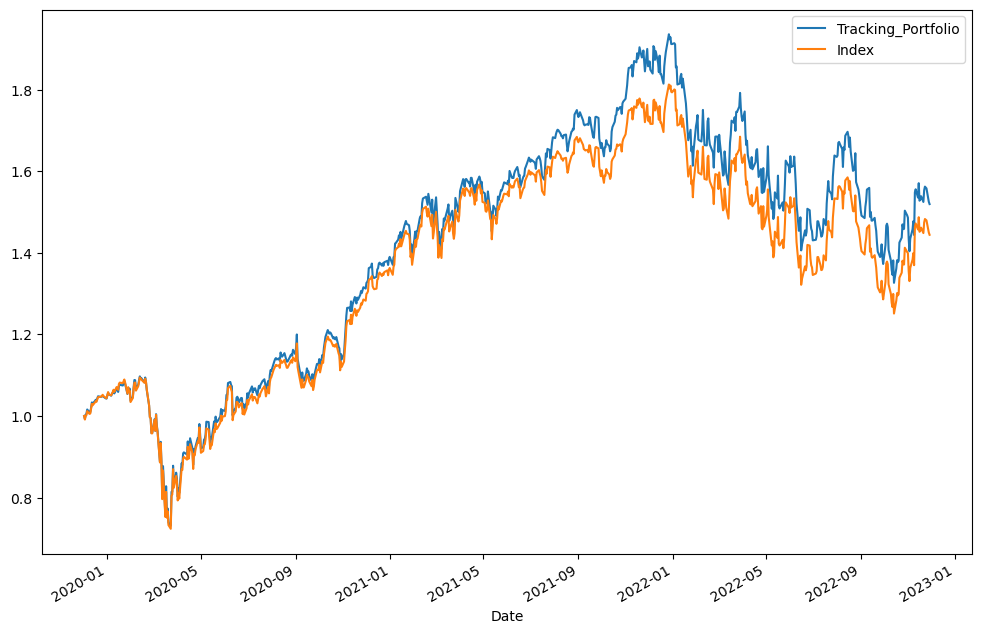

In [177]:
tportfolio.plot(figsize = (12, 8))
(index/index.iloc[0]).plot()
plt.legend()
plt.show()

---

# Trading with Interactive Brokers

In [178]:
# all the instument in our portfolio
tstocks

array(['TXN', 'SPOK', 'CTSH', 'GEGGL', 'GIC', 'QCOM', 'VSH', 'AVGO',
       'LFUS', 'BRC', 'ENTG', 'POWI', 'OTRKP', 'HPQ', 'CLMB', 'MSA',
       'SSTK', 'HCKT', 'APH', 'NVDA', 'BCO', 'NRC', 'INTC', 'INTU', 'ADI',
       'SSNC', 'JKHY', 'HUBB', 'NOC', 'MSFT', 'EBIX', 'CSGS', 'NTAP',
       'AMAT', 'LRCX', 'KAI', 'UI', 'MCHP', 'MPWR', 'NVEC'], dtype='<U5')

In [179]:
# We want to by 1 for each instuments.
shares = 1

In [180]:
# What the cost of buy one stock from each instrument?
# we multiply the lest price of the stocks by the count share
close[tstocks].iloc[-1].sum() * shares

# So for buy this index, we have to pay 5472$

5472.264943957329

In [181]:
# Create data frame of all the instrument taht in our portfolio
target = pd.DataFrame(data = {"symbol": tstocks})
target

,symbol
0,TXN
1,SPOK
2,CTSH
3,GEGGL
4,GIC
5,QCOM
6,VSH
7,AVGO
8,LFUS
9,BRC


In [182]:
# Add the position column
target["position"] = shares
target

# we want to buy 1 for each instument

,symbol,position
0,TXN,1
1,SPOK,1
2,CTSH,1
3,GEGGL,1
4,GIC,1
5,QCOM,1
6,VSH,1
7,AVGO,1
8,LFUS,1
9,BRC,1


In [185]:
from ib_insync import *
util.startLoop()

In [186]:
ib = IB()

In [187]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [188]:
# Check current positions
pos = ib.positions()
pos

[Position(account='DU8048713', contract=Stock(conId=756733, symbol='SPY', exchange='ARCA', currency='USD', localSymbol='SPY', tradingClass='SPY'), position=1.0, avgCost=436.68)]

In [189]:
# print them in DataFrame
df = util.df(pos)
df

,account,contract,position,avgCost
0,DU8048713,"Stock(conId=756733, symbol='SPY', exchange='AR...",1.0,436.68


In [190]:
# Add 2 columns: symbol and its ID 
if df is not None:
    df["symbol"] = df.contract.apply(lambda x: x.symbol)
    df["conID"] = df.contract.apply(lambda x: x.conId)
else: 
    df = pd.DataFrame(columns = ["symbol", "position"])

In [191]:
df

,account,contract,position,avgCost,symbol,conID
0,DU8048713,"Stock(conId=756733, symbol='SPY', exchange='AR...",1.0,436.68,SPY,756733


In [192]:
trades = pd.merge(target, df[["symbol", "position"]], "outer", on = "symbol", suffixes = ["_t", "_a"])
trades

,symbol,position_t,position_a
0,TXN,1.0,NaN
1,SPOK,1.0,NaN
2,CTSH,1.0,NaN
3,GEGGL,1.0,NaN
4,GIC,1.0,NaN
5,QCOM,1.0,NaN
6,VSH,1.0,NaN
7,AVGO,1.0,NaN
8,LFUS,1.0,NaN
9,BRC,1.0,NaN


In [193]:
trades.fillna(0, inplace = True)
trades

,symbol,position_t,position_a
0,TXN,1.0,0.0
1,SPOK,1.0,0.0
2,CTSH,1.0,0.0
3,GEGGL,1.0,0.0
4,GIC,1.0,0.0
5,QCOM,1.0,0.0
6,VSH,1.0,0.0
7,AVGO,1.0,0.0
8,LFUS,1.0,0.0
9,BRC,1.0,0.0


In [194]:
# Consider what  to trade
trades["trades"] = trades.position_t - trades.position_a 

In [195]:
trades

,symbol,position_t,position_a,trades
0,TXN,1.0,0.0,1.0
1,SPOK,1.0,0.0,1.0
2,CTSH,1.0,0.0,1.0
3,GEGGL,1.0,0.0,1.0
4,GIC,1.0,0.0,1.0
5,QCOM,1.0,0.0,1.0
6,VSH,1.0,0.0,1.0
7,AVGO,1.0,0.0,1.0
8,LFUS,1.0,0.0,1.0
9,BRC,1.0,0.0,1.0


In [196]:
trades = trades[trades.trades !=0].set_index("symbol").copy()
trades

,position_t,position_a,trades
symbol,,,
TXN,1.0,0.0,1.0
SPOK,1.0,0.0,1.0
CTSH,1.0,0.0,1.0
GEGGL,1.0,0.0,1.0
GIC,1.0,0.0,1.0
QCOM,1.0,0.0,1.0
VSH,1.0,0.0,1.0
AVGO,1.0,0.0,1.0
LFUS,1.0,0.0,1.0


In [197]:
# Trade! (if its not in trading ours - it will not work.)

# Loop all over the symbol
for symbol in trades.index:
    
    to_trade = trades.loc[symbol, "trades"] # extract the symbol and its trades (how much buy/sell)

    if to_trade > 0: # BUY the stock 
        side = "BUY"
    elif to_trade < 0: # SELL the stock
        side = "SELL"
     
    contract = Stock(symbol, "SMART", "USD") # Subscribe to the contract
    cds = ib.reqContractDetails(contract) # request the data
    
    # no contracts
    if len(cds) == 0: 
        print("No Contract for {} found.".format(symbol))
    
    # only one contract
    elif len(cds) == 1: 
        contract = cds[0].contract               # store the contract.
        order = MarketOrder(side, abs(to_trade)) # create the order.
        trade = ib.placeOrder(contract, order)   # place the order with the contract.
        ib.sleep(2) # new
        #while not trade.isDone():
            #ib.waitOnUpdate()
        if trade.orderStatus.status == "Filled":
            print("{} {} @ {}".format(side, symbol, trade.orderStatus.avgFillPrice))
        else:
            print("{} {} {}".format(side, symbol, trade.orderStatus.status)) # new
    
    # multiple contract 
    else: 
        contract = cds[0].contract   # store the contract.
        print("Multiple Contracts for {} found.".format(symbol))
        order = MarketOrder(side, abs(to_trade))  # create the order.
        trade = ib.placeOrder(contract, order)    # place the order with the contract.
        ib.sleep(2) # new
        #while not trade.isDone():
            #ib.waitOnUpdate()
        if trade.orderStatus.status == "Filled":
            print("{} {} @ {}".format(side, symbol, trade.orderStatus.avgFillPrice))
        else:
            print("{} {} {}".format(side, symbol, trade.orderStatus.status))# new


ib.sleep(30) # sleep 30 seconds
pos = ib.positions() # take the positions 
df = util.df(pos) # store them in DataFrame

if df is not None:
    df["symbol"] = df.contract.apply(lambda x: x.symbol)
    df["conID"] = df.contract.apply(lambda x: x.conId)
else: 
    df = pd.DataFrame(columns = ["symbol", "position"])
    
df

BUY TXN PendingSubmit
BUY SPOK PendingSubmit
BUY CTSH PendingSubmit
BUY GEGGL PendingSubmit
BUY GIC PendingSubmit
BUY QCOM PendingSubmit
BUY VSH PendingSubmit
BUY AVGO PendingSubmit
BUY LFUS PendingSubmit
BUY BRC PendingSubmit
BUY ENTG PendingSubmit
BUY POWI PendingSubmit
BUY OTRKP PreSubmitted
BUY HPQ PendingSubmit
BUY CLMB PendingSubmit
BUY MSA PendingSubmit
BUY SSTK PendingSubmit
BUY HCKT PendingSubmit
BUY APH PendingSubmit
BUY NVDA PendingSubmit
BUY BCO PendingSubmit
BUY NRC PendingSubmit
BUY INTC PendingSubmit
BUY INTU PendingSubmit
BUY ADI PendingSubmit
BUY SSNC PendingSubmit
BUY JKHY PendingSubmit
BUY HUBB PendingSubmit
BUY NOC PendingSubmit
BUY MSFT PendingSubmit
BUY EBIX PendingSubmit
BUY CSGS PendingSubmit
BUY NTAP PendingSubmit
BUY AMAT PendingSubmit
BUY LRCX PendingSubmit
BUY KAI PendingSubmit
BUY UI PendingSubmit
BUY MCHP PendingSubmit
BUY MPWR PendingSubmit
BUY NVEC PendingSubmit
SELL SPY PendingSubmit


,account,contract,position,avgCost,symbol,conID
0,DU8048713,"Stock(conId=756733, symbol='SPY', exchange='AR...",1.0,436.68,SPY,756733


In [198]:
ib.openOrders()

[MarketOrder(orderId=125, clientId=1, permId=1172341378, action='BUY', totalQuantity=1.0, lmtPrice=0.0, auxPrice=0.0)]

In [199]:
ib.disconnect()

----

----

# What´s next?

You should __monitor and measure the performance__ of your Portfolio and
- check the __tracking quality__
- __compare__ the performance of your strategy with an __appropriate Benchmark__ (e.g. S&P 500)

On a regular basis (e.g. annually) you should __reconstitute your portfolio__ and 
- remove stocks that __don´t fit the strategy__ any more (e.g. stop paying dividends)
- add new stocks that __fit the strategy__ then
- add/remove stocks to __improve tracking quality__
- to manage/minimize trading costs, you can __limit the number of stocks__ to be added/removed

---

# Backtesting and the Look-Ahead Bias

In [200]:
# The index portfolio 
index

Date
2019-12-02    100.000000
2019-12-03     99.119744
2019-12-04    100.032962
2019-12-05    100.209697
2019-12-06    101.192304
                 ...    
2022-11-22    147.426134
2022-11-23    148.270003
2022-11-25    147.938684
2022-11-28    144.950669
2022-11-29    144.404897
Name: Index, Length: 755, dtype: float64

__Is this the historical performance of our strategy (Backtest)? No__

- Stocks were selected today based on whether they __fit the strategy today__
- To backtest the strategy (e.g. for the last year) we have to make the selection __before the backtesting period__ (one year ago) 
- otherwise: __Look-Ahead Bias__ (assuming we can make decisions based on future data that is not available yet).

__Realistic Assumption__: Country and Sector hasn´t changed in the last year

In [201]:
data

Adj Close                                                           \
                AAOI        AAPL  ACCD ACEV ACEVU ACEVW       ACIW       ACLS   
Date                                                                            
2019-12-02     10.71   64.338280   NaN  NaN   NaN   NaN  36.730000  21.209999   
2019-12-03     10.35   63.191128   NaN  NaN   NaN   NaN  36.639999  21.530001   
2019-12-04     10.39   63.748878   NaN  NaN   NaN   NaN  36.150002  22.299999   
2019-12-05     10.46   64.684135   NaN  NaN   NaN   NaN  36.049999  22.740000   
2019-12-06     10.37   65.933594   NaN  NaN   NaN   NaN  36.410000  22.840000   
...              ...         ...   ...  ...   ...   ...        ...        ...   
2022-11-22      2.28  149.345215  8.19  NaN   NaN   NaN  20.410000  78.699997   
2022-11-23      2.18  150.230316  8.61  NaN   NaN   NaN  20.639999  79.070000   
2022-11-25      2.19  147.286743  8.44  NaN   NaN   NaN  20.900000  79.379997   
2022-11-28      2.11  143.418365  7.89  NaN   NaN   NaN  20.430000  76.690002   
2022-11-29      2.11  140.385315  8.20  NaN   NaN   NaN  20.370001  76.309998   

                             ...     Volume                             \
                ACMR   ACON  ...       XPON      XRX     YELP     YEXT   
Date                         ...                                         
2019-12-02  4.636667    NaN  ...        NaN  1421400  1311600   739000   
2019-12-03  4.663333    NaN  ...        NaN  3213300   851600   847000   
2019-12-04  4.703333    NaN  ...        NaN  1470000   820000   713300   
2019-12-05  4.890000    NaN  ...        NaN  2357400   932500  1957600   
2019-12-06  5.140000    NaN  ...        NaN  1826100   630900  8920300   
...              ...    ...  ...        ...      ...      ...      ...   
2022-11-22  8.740000  0.840  ...    24400.0   963000   821100   642200   
2022-11-23  8.670000  0.820  ...    37000.0  1099600   436000   793900   
2022-11-25  8.630000  0.820  ...  1375600.0   512000   176000   330700   
2022-11-28  8.250000  0.765  ...   132200.0   839400   412300  1086800   
2022-11-29  8.470000  0.798  ...    60600.0  1110300   427000   565500   

                                                                     
              ZBRA      ZFOX    ZFOXW         ZI        ZM       ZS  
Date                                                                 
2019-12-02  305600       NaN      NaN        NaN   3138600  4164600  
2019-12-03  288500       NaN      NaN        NaN   2444200  4494500  
2019-12-04  368500       NaN      NaN        NaN   2076500  7754300  
2019-12-05  355900       NaN      NaN        NaN   3672600  3181000  
2019-12-06  461400       NaN      NaN        NaN  11253600  3071500  
...            ...       ...      ...        ...       ...      ...  
2022-11-22  442100  109500.0   2000.0  3324000.0  15729400  1203000  
2022-11-23  464600   44900.0  24486.0  2454100.0   4938100  1349400  
2022-11-25  202400   19600.0   3500.0  2059400.0   2658000   603300  
2022-11-28  492900   51000.0      0.0  2301000.0   6245400  1515000  
2022-11-29  534900   19100.0   1600.0  4247900.0   4879300  1906300  

[755 rows x 4772 columns]

- Plan: __Backtest__ from "2021-12-01" to "2022-11-30" 
- Dividend-paying Stocks: Paying any Dividends in the year before (from "2020-12-01" to "2021-11-30")

In [202]:
# compute the sum of Dividents paymenys for each instruments, between 2020-12-01":"2021-11-30. 
dividends = data.Dividends.loc["2020-12-01":"2021-11-30"].sum()
dividends

AAOI     0.000
AAPL     0.865
ACCD     0.000
ACIW     0.000
ACLS     0.000
         ...  
ZFOX     0.000
ZFOXW    0.000
ZI       0.000
ZM       0.000
ZS       0.000
Length: 538, dtype: float64

In [203]:
# All the instrumnts that pay Dividents. 
symbols = dividends[dividends > 0].index
symbols

Index(['AAPL', 'ADEA', 'ADI', 'AMAT', 'AMKR', 'AMSWA', 'APH', 'AVGO', 'AVT',
       'BCO', 'BHE', 'BKTI', 'BRC', 'BSY', 'CIX', 'CLMB', 'CMTL', 'CNXC',
       'CNXN', 'CSGS', 'CTS', 'CTSH', 'DLB', 'EBIX', 'ENTG', 'ESP', 'FSS',
       'GEN', 'GIC', 'GLW', 'HCKT', 'HPQ', 'HUBB', 'IBM', 'III', 'INTC',
       'INTU', 'JBL', 'JKHY', 'JNPR', 'KAI', 'KLAC', 'LDOS', 'LFUS', 'LOGI',
       'LRCX', 'MCHP', 'MEI', 'MPWR', 'MSA', 'MSFT', 'MSI', 'MU', 'NATI',
       'NOC', 'NRC', 'NTAP', 'NTIP', 'NVDA', 'NVEC', 'OLED', 'ORCL', 'OTRKP',
       'PCTI', 'PEGA', 'PEGY', 'POWI', 'PRGS', 'QCOM', 'RELL', 'SLNHP', 'SLP',
       'SPOK', 'SSNC', 'SSNT', 'SSTK', 'SWI', 'SWKS', 'TAIT', 'TTEC', 'TXN',
       'UI', 'VMW', 'VRT', 'VSH', 'WFCF', 'WOLF', 'XRX'],
      dtype='object')

In [204]:
len(symbols)

88

In [205]:
# Extract the close price of all the sumbols. 
close = data.Close.loc["2021-12-01":"2022-11-30", symbols].copy()
close

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,TAIT,TTEC,TXN,UI,VMW,VRT,VSH,WFCF,WOLF,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,164.770004,4.796296,180.839996,151.669998,22.040001,22.590000,79.989998,554.760010,36.110001,60.169998,...,4.04,83.410004,191.759995,296.670013,114.000000,24.700001,20.490000,15.53,118.050003,19.160000
2021-12-02,163.759995,4.970899,180.630005,146.490005,22.309999,23.000000,81.459999,552.450012,37.520000,62.169998,...,3.99,85.199997,193.580002,304.470001,117.339996,25.639999,20.790001,15.79,119.089996,19.900000
2021-12-03,161.839996,4.873016,180.789993,145.830002,22.790001,22.790001,81.669998,558.119995,38.049999,61.919998,...,3.94,83.830002,193.380005,301.000000,118.860001,25.510000,20.600000,15.35,114.989998,20.000000
2021-12-06,165.320007,5.153439,181.059998,147.380005,23.000000,23.010000,82.750000,564.979980,38.250000,63.660000,...,3.91,86.680000,194.610001,269.700012,115.580002,25.830000,20.840000,15.36,115.820000,20.469999
2021-12-07,171.179993,5.208995,186.639999,156.889999,24.490000,23.129999,83.849998,590.400024,38.849998,63.310001,...,4.00,87.639999,199.029999,287.589996,116.650002,26.559999,21.360001,15.50,123.379997,20.629999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,150.179993,10.100000,168.429993,107.040001,27.600000,14.290000,80.080002,530.049988,44.849998,60.900002,...,3.79,47.389999,177.220001,294.230011,118.389999,13.810000,22.670000,14.10,90.839996,15.440000
2022-11-23,151.070007,10.270000,169.199997,107.669998,27.750000,14.540000,80.070000,533.640015,45.209999,60.619999,...,3.77,47.290001,178.979996,293.070007,119.349998,13.860000,22.639999,14.40,91.940002,15.750000
2022-11-25,148.110001,10.260000,167.089996,105.820000,27.299999,14.600000,80.339996,529.909973,45.139999,60.720001,...,3.75,47.000000,177.070007,294.079987,119.260002,13.740000,22.450001,14.12,90.029999,15.910000


In [206]:
# Price weigthed Index over time (compute the weigth of each instrument) 
weights_PWI = close.div(close.sum(axis = 1), axis = "rows")
weights_PWI

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,TAIT,TTEC,TXN,UI,VMW,VRT,VSH,WFCF,WOLF,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,0.016764,0.000488,0.018399,0.015431,0.002242,0.002298,0.008138,0.056441,0.003674,0.006122,...,0.000411,0.008486,0.019509,0.030183,0.011598,0.002513,0.002085,0.001580,0.012010,0.001949
2021-12-02,0.016544,0.000502,0.018249,0.014800,0.002254,0.002324,0.008230,0.055813,0.003791,0.006281,...,0.000403,0.008608,0.019557,0.030760,0.011855,0.002590,0.002100,0.001595,0.012031,0.002010
2021-12-03,0.016521,0.000497,0.018455,0.014886,0.002326,0.002326,0.008337,0.056973,0.003884,0.006321,...,0.000402,0.008557,0.019740,0.030726,0.012133,0.002604,0.002103,0.001567,0.011738,0.002042
2021-12-06,0.016879,0.000526,0.018486,0.015047,0.002348,0.002349,0.008448,0.057682,0.003905,0.006499,...,0.000399,0.008850,0.019869,0.027535,0.011800,0.002637,0.002128,0.001568,0.011825,0.002090
2021-12-07,0.016912,0.000515,0.018440,0.015501,0.002420,0.002285,0.008284,0.058331,0.003838,0.006255,...,0.000395,0.008659,0.019664,0.028414,0.011525,0.002624,0.002110,0.001531,0.012190,0.002038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,0.018033,0.001213,0.020224,0.012853,0.003314,0.001716,0.009616,0.063646,0.005385,0.007313,...,0.000455,0.005690,0.021280,0.035330,0.014216,0.001658,0.002722,0.001693,0.010908,0.001854
2022-11-23,0.018035,0.001226,0.020200,0.012854,0.003313,0.001736,0.009559,0.063708,0.005397,0.007237,...,0.000450,0.005646,0.021367,0.034988,0.014248,0.001655,0.002703,0.001719,0.010976,0.001880
2022-11-25,0.017728,0.001228,0.020000,0.012666,0.003268,0.001748,0.009617,0.063429,0.005403,0.007268,...,0.000449,0.005626,0.021195,0.035201,0.014275,0.001645,0.002687,0.001690,0.010776,0.001904


In [207]:
# compute the simple return of the instruments over the time 
total_returns = data["Adj Close"].loc["2021-12-01":"2022-11-30", symbols].pct_change() # Adj Close Prices!
total_returns

,AAPL,ADEA,ADI,AMAT,AMKR,AMSWA,APH,AVGO,AVT,BCO,...,TAIT,TTEC,TXN,UI,VMW,VRT,VSH,WFCF,WOLF,XRX
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,-0.006130,0.036404,0.002665,-0.034153,0.012250,0.018150,0.018377,-0.004164,0.039047,0.033239,...,-0.012376,0.021460,0.009491,0.026292,0.029298,0.038057,0.014641,0.016742,0.008810,0.038622
2021-12-03,-0.011724,-0.019691,0.000886,-0.004505,0.021515,-0.009130,0.002578,0.010263,0.014126,-0.004021,...,-0.012531,-0.016080,-0.001033,-0.011397,0.012954,-0.005070,-0.009139,-0.027866,-0.034428,0.005025
2021-12-06,0.021503,0.057546,0.001494,0.010629,0.011434,0.009653,0.013224,0.012291,0.005256,0.028101,...,-0.007614,0.033997,0.006361,-0.103987,-0.027595,0.012544,0.016585,0.000651,0.007218,0.023500
2021-12-07,0.035446,0.010780,0.030818,0.064527,0.064783,0.005215,0.013293,0.044993,0.015686,-0.005498,...,0.023018,0.011075,0.022712,0.066333,0.009258,0.028262,0.024952,0.009115,0.065274,0.007817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-22,0.014661,0.040165,0.057712,0.018071,0.012101,-0.001398,0.006409,0.024370,0.010818,0.001645,...,0.005305,0.006157,0.027958,0.021490,0.013873,-0.015681,0.006214,-0.013986,0.030166,0.013788
2022-11-23,0.005927,0.016832,0.004572,0.008335,0.005435,0.017495,-0.000125,0.006773,0.008027,-0.004598,...,-0.005277,-0.002110,0.009931,-0.003942,0.008109,0.003621,-0.001323,0.021277,0.012109,0.020078
2022-11-25,-0.019594,-0.000974,-0.012470,-0.017182,-0.016216,0.004127,0.003372,-0.006990,-0.001548,0.001650,...,-0.005305,-0.006132,-0.010671,0.003446,-0.000754,-0.008658,-0.008392,-0.019444,-0.020774,0.010159


In [208]:
# Compute the return of the index
returns_index = total_returns.mul(weights_PWI.shift()).sum(axis = "columns")
returns_index

Date
2021-12-01    0.000000
2021-12-02    0.007190
2021-12-03   -0.010310
2021-12-06   -0.000145
2021-12-07    0.033401
                ...   
2022-11-22    0.018090
2022-11-23    0.005831
2022-11-25   -0.002418
2022-11-28   -0.020619
2022-11-29   -0.003664
Length: 251, dtype: float64

In [209]:
# cumelative return, convert to base of 100
index = returns_index.add(1).cumprod().mul(100)
index

Date
2021-12-01    100.000000
2021-12-02    100.718964
2021-12-03     99.680564
2021-12-06     99.666143
2021-12-07    102.995076
                 ...    
2022-11-22     85.959772
2022-11-23     86.461033
2022-11-25     86.251944
2022-11-28     84.473499
2022-11-29     84.163960
Length: 251, dtype: float64

---

# Backtesting and the Survivorship Bias

Still something missing? Yes.
- The backtest does __not include failed/delisted Stocks__
- It only includes Stocks that survived until today (__Survivorship Bias__). 
- Backtesting with Survivorship Bias typically __overstates__ true perfromance.
- Solution: include failed/delisted stocks (more advanced data source needed!)

---

# Benchmarking and the Information Ratio

In [210]:
bench = index.to_frame()
bench

,0
Date,
2021-12-01,100.000000
2021-12-02,100.718964
2021-12-03,99.680564
2021-12-06,99.666143
2021-12-07,102.995076
...,...
2022-11-22,85.959772
2022-11-23,86.461033
2022-11-25,86.251944


In [211]:
# This is the return of our index that we have build 
bench.columns = ["strategy"]
bench

,strategy
Date,
2021-12-01,100.000000
2021-12-02,100.718964
2021-12-03,99.680564
2021-12-06,99.666143
2021-12-07,102.995076
...,...
2022-11-22,85.959772
2022-11-23,86.461033
2022-11-25,86.251944


In [212]:
# Download the SP500 in the exaxt dates that we want to compare (like as the dates of our portfolio)
SP500 = yf.download("^SP500TR", "2021-12-01", "2022-11-30") 
SP500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,9634.110352,9738.919922,9443.200195,9446.209961,9446.209961,0
2021-12-02,9430.309570,9619.959961,9430.309570,9581.790039,9581.790039,0
2021-12-03,9608.190430,9646.980469,9410.820312,9501.280273,9501.280273,0
2021-12-06,9522.370117,9656.509766,9506.459961,9613.019531,9613.019531,0
2021-12-07,9697.519531,9827.280273,9697.519531,9812.200195,9812.200195,0
...,...,...,...,...,...,...
2022-11-22,8429.780273,8515.620117,8412.509766,8511.480469,8511.480469,0
2022-11-23,8504.950195,8576.139648,8501.690430,8562.269531,8562.269531,0
2022-11-25,8554.639648,8576.700195,8549.110352,8560.089844,8560.089844,0


In [213]:
# stire the SP500 benchmark in our bench comperation data frame.  
bench["benchmark"] = SP500["Adj Close"].div(SP500["Adj Close"][0]).mul(100)
bench

# This is our strategy vs the SP500 

C:\Users\97250\AppData\Local\Temp\ipykernel_11392\2807952879.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bench["benchmark"] = SP500["Adj Close"].div(SP500["Adj Close"][0]).mul(100)


,strategy,benchmark
Date,,
2021-12-01,100.000000,100.000000
2021-12-02,100.718964,101.435285
2021-12-03,99.680564,100.582988
2021-12-06,99.666143,101.765889
2021-12-07,102.995076,103.874466
...,...,...
2022-11-22,85.959772,90.104714
2022-11-23,86.461033,90.642380
2022-11-25,86.251944,90.619305


__Compute our strategy and the SP500__

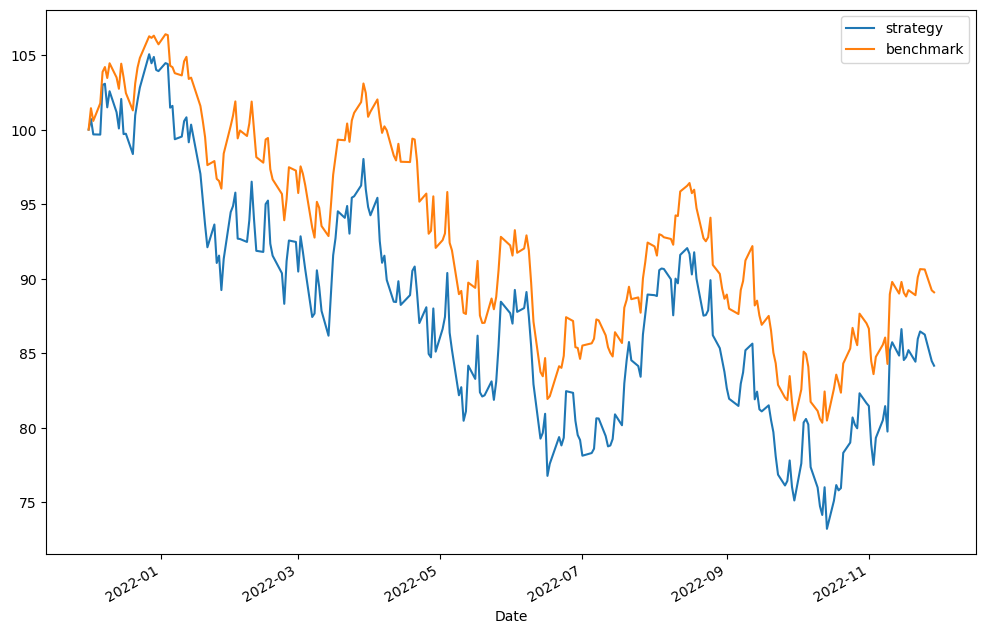

In [214]:
bench.plot(figsize = (12, 8))
plt.show()

In [215]:
# compute the simple return of our strategy and of the sp500 
returns = bench.pct_change()
returns

,strategy,benchmark
Date,,
2021-12-01,NaN,NaN
2021-12-02,0.007190,0.014353
2021-12-03,-0.010310,-0.008402
2021-12-06,-0.000145,0.011760
2021-12-07,0.033401,0.020720
...,...,...
2022-11-22,0.018090,0.013606
2022-11-23,0.005831,0.005967
2022-11-25,-0.002418,-0.000255


In [216]:
# Function for calculate the annualize risk and return 
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [221]:
# Compute the annualize risk & return of our strategy and of the SP500
ann_risk_return(returns)

,ann. Risk,CAGR
strategy,0.312370,-0.159520
benchmark,0.239704,-0.109961


__-> Strategy underperformed in market downturn (no surprise for tech stocks)__

In [218]:
# Function Compute tracking error 
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [219]:
# Compute the tracking error of our strategy against the SP500  
summary = tracking(returns, "benchmark")
summary

,TrackingError,ActiveReturn
strategy,0.117902,-0.043297
benchmark,0.000000,0.000000


The __Information Ratio (IR)__ measures and compares the active return of an investment (e.g., a security or portfolio) compared to a benchmark index relative to the volatility of the active return (also known as active risk or benchmark tracking risk). It is defined as the active return (the difference between the returns of the investment and the returns of the benchmark) divided by the tracking error (the standard deviation of the active return, i.e., the additional risk). It represents the __additional amount of return that an investor receives per unit of increase in risk__. (source: Wikipedia)

In [220]:
# compute the information ratio 
# its the proportion between the active return to the tracking error 
summary["InformationRatio"] = summary.ActiveReturn / summary.TrackingError
summary

,TrackingError,ActiveReturn,InformationRatio
strategy,0.117902,-0.043297,-0.367226
benchmark,0.000000,0.000000,NaN


- The IR __measures the success__ of active/semi-active strategies relative to the benchmark
- postive IR: __"beating the benchmark"__
- __The higher the better__ (semi-active investing)